**Previsão da ação da Sberbank, com a guerra na Ucrânia em 2022.**

O objetivo no presente trabalho é mostrar conceitos de machine learning para realizar previsões das ações do Sberbank antes, durante e pós a invasão da Rússia na Ucrânia. Com isso, se poder ter uma noção de como o valor da ação se comporta em uns momentos na frente, utilizando média movel de 5 ou 21 dias. Claro que uma guerra é a logo prazo, isso seria uma possbilidade se o conflito internacional terminasse em curto prazo.

In [ ]:
#importando as bibliotecas que serão utilizadas para a programação em prever o preco das ações da Sberbank
# obs: df = dataframe 
import pandas as pd
from sklearn.feature_selection import SelectKBest # melhores features para o modelo
from sklearn.model_selection import GridSearchCV # melhores parametros para o modelo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler # normalizar as features
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Lendo o arquivo csv para consultar os dados

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SBER.ME.csv", delimiter=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-27,307.119995,313.899994,305.720001,313.149994,313.149994,67195230.0
1,2021-05-28,313.299988,314.000000,309.059998,310.019989,310.019989,33327000.0
2,2021-05-31,309.299988,312.600006,308.820007,310.390015,310.390015,22034940.0
3,2021-06-01,312.600006,314.170013,310.029999,311.209991,311.209991,35801140.0
4,2021-06-02,311.600006,313.850006,310.609985,313.440002,313.440002,24476570.0
...,...,...,...,...,...,...,...
231,2022-05-23,125.599998,125.599998,125.599998,125.599998,125.599998,0.0
232,2022-05-24,125.599998,125.599998,125.599998,125.599998,125.599998,0.0
233,2022-05-25,NaN,NaN,NaN,NaN,NaN,NaN
234,2022-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#verificando o tipo do arquivo que está no drive e colab
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
# Alterando o tipo de data do arquivo
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
df.tail() # novo conjunto de dados

,Date,Open,High,Low,Close,Adj Close,Volume
231,2022-05-23,125.599998,125.599998,125.599998,125.599998,125.599998,0.0
232,2022-05-24,125.599998,125.599998,125.599998,125.599998,125.599998,0.0
233,2022-05-25,NaN,NaN,NaN,NaN,NaN,NaN
234,2022-05-26,NaN,NaN,NaN,NaN,NaN,NaN
235,2022-05-27,123.000000,123.500000,120.900002,121.680000,121.680000,22448220.0


In [ ]:
#criando novos campos/espaços de medias móveis em 5 e 21 dias
df['mm5d'] = df['Close'].rolling(5).mean()
df['mm21d'] = df['Close'].rolling(21).mean()

In [ ]:
df.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume,mm5d,mm21d
0,2021-05-27,307.119995,313.899994,305.720001,313.149994,313.149994,67195230.0,NaN,NaN
1,2021-05-28,313.299988,314.000000,309.059998,310.019989,310.019989,33327000.0,NaN,NaN
2,2021-05-31,309.299988,312.600006,308.820007,310.390015,310.390015,22034940.0,NaN,NaN
3,2021-06-01,312.600006,314.170013,310.029999,311.209991,311.209991,35801140.0,NaN,NaN
4,2021-06-02,311.600006,313.850006,310.609985,313.440002,313.440002,24476570.0,311.641998,NaN
5,2021-06-03,314.809998,315.709991,309.869995,312.769989,312.769989,32737141.0,311.565997,NaN
6,2021-06-04,313.000000,313.000000,307.600006,310.679993,310.679993,34898290.0,311.697998,NaN
7,2021-06-07,310.029999,316.000000,308.570007,315.109985,315.109985,38682370.0,312.641992,NaN
8,2021-06-08,315.290009,316.179993,312.500000,314.399994,314.399994,33558681.0,313.279993,NaN
9,2021-06-09,315.000000,315.899994,312.899994,315.269989,315.269989,23704850.0,313.645990,NaN


In [ ]:
#Colocando/Empurrando um dia para frente os valores das ações do banco 
df['Close'] = df['Close'].shift(-1)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,mm5d,mm21d
0,2021-05-27,307.119995,313.899994,305.720001,310.019989,313.149994,67195230.0,NaN,NaN
1,2021-05-28,313.299988,314.000000,309.059998,310.390015,310.019989,33327000.0,NaN,NaN
2,2021-05-31,309.299988,312.600006,308.820007,311.209991,310.390015,22034940.0,NaN,NaN
3,2021-06-01,312.600006,314.170013,310.029999,313.440002,311.209991,35801140.0,NaN,NaN
4,2021-06-02,311.600006,313.850006,310.609985,312.769989,313.440002,24476570.0,311.641998,NaN


In [ ]:
#retirando os dados nulos, campos vazios
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,mm5d,mm21d
20,2021-06-24,309.799988,311.200012,308.839996,311.799988,310.470001,18742160.0,309.956000,312.296664
21,2021-06-25,310.579987,312.500000,309.820007,309.570007,311.799988,20727122.0,310.353998,312.232378
22,2021-06-28,311.769989,312.059998,309.130005,305.459991,309.570007,18386430.0,310.421997,312.210951
23,2021-06-29,308.700012,309.230011,303.660004,305.549988,305.459991,32822870.0,309.583996,311.976188
24,2021-06-30,306.190002,306.910004,303.339996,305.299988,305.549988,30052911.0,308.569995,311.706664
...,...,...,...,...,...,...,...,...,...
227,2022-05-17,124.000000,127.779999,123.650002,125.120003,127.750000,41963590.0,122.127998,124.018095
228,2022-05-18,128.199997,131.300003,125.000000,125.599998,125.120003,55565940.0,122.484000,123.523810
229,2022-05-19,125.309998,126.860001,123.209999,125.599998,125.599998,34246550.0,123.773999,123.359524
230,2022-05-20,125.599998,125.599998,125.599998,125.599998,125.599998,0.0,124.853999,123.108095


In [ ]:
#recambiando o dataframe para melhor visualização
df= df.reset_index(drop=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,mm5d,mm21d
0,2021-06-24,309.799988,311.200012,308.839996,311.799988,310.470001,18742160.0,309.956000,312.296664
1,2021-06-25,310.579987,312.500000,309.820007,309.570007,311.799988,20727122.0,310.353998,312.232378
2,2021-06-28,311.769989,312.059998,309.130005,305.459991,309.570007,18386430.0,310.421997,312.210951
3,2021-06-29,308.700012,309.230011,303.660004,305.549988,305.459991,32822870.0,309.583996,311.976188
4,2021-06-30,306.190002,306.910004,303.339996,305.299988,305.549988,30052911.0,308.569995,311.706664
...,...,...,...,...,...,...,...,...,...
207,2022-05-17,124.000000,127.779999,123.650002,125.120003,127.750000,41963590.0,122.127998,124.018095
208,2022-05-18,128.199997,131.300003,125.000000,125.599998,125.120003,55565940.0,122.484000,123.523810
209,2022-05-19,125.309998,126.860001,123.209999,125.599998,125.599998,34246550.0,123.773999,123.359524
210,2022-05-20,125.599998,125.599998,125.599998,125.599998,125.599998,0.0,124.853999,123.108095


In [ ]:
#Verificando quantidade (número) de linhas
qtd_linhas = len(df)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:148 linhas teste= 148:211 linhas validação= 211'

In [ ]:
#Separando as features e labels
features = df.drop(['Date', 'Close'], 1)
labels = df['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Escolhendo as melhores features com o Kbest

features_list = ('Open','High','Low','Volume','mm5d','mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mm5d': 459.1688664885386, 'Low': 269.2736051258881, 'Volume': 225.00802938613577, 'High': 122.94099005038231, 'mm21d': 8.703041025779976}


In [ ]:
#Separando as features já escolhidas
features = df.loc[:,['High','Low','Volume','mm5d']]

In [ ]:
features

,High,Low,Volume,mm5d
0,311.200012,308.839996,18742160.0,309.956000
1,312.500000,309.820007,20727122.0,310.353998
2,312.059998,309.130005,18386430.0,310.421997
3,309.230011,303.660004,32822870.0,309.583996
4,306.910004,303.339996,30052911.0,308.569995
...,...,...,...,...
207,127.779999,123.650002,41963590.0,122.127998
208,131.300003,125.000000,55565940.0,122.484000
209,126.860001,123.209999,34246550.0,123.773999
210,125.599998,125.599998,0.0,124.853999


In [ ]:
#Separando os dados de treino, teste e também para a validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

148 148
63 63


In [ ]:
#Regularizando/normalização dos dados de entrada(features)

# Elaborando/Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Regularizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Regularizando os dados de entrada(teste)

In [ ]:
#treinamento usando regressão linear para previsão
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:92.93'

In [ ]:
#rede neural para fazer um modelo específico de aprendizado que simula a maneira como sinapses funcionam no cérebro 
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train_scale, y_train)
pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


'Coeficiente de determinação:-247.58'

In [ ]:
#rede neural com o ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train_scale,y_train)
clf = search.best_estimator_
pred= search.predict(X_test_scale)

cd = search.score(X_test_scale, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


'Coeficiente de determinação:92.96'

In [ ]:
real = features.tail(1)
real

,High,Low,Volume,mm5d
211,125.599998,125.599998,0.0,125.933999


In [ ]:
#executando a previsão da ação Sberbank


previsao=scaler.transform(real)


pred=lr.predict(previsao)

pred

array([124.97203928])

In [ ]:
data_pregao_full=df['Date']
data_pregao=data_pregao_full.tail(1)

res_full=df['Close']
res=res_full.tail(1)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

print(df)

                   real    previsao
data_pregao                        
2022-05-23   125.599998  124.972039


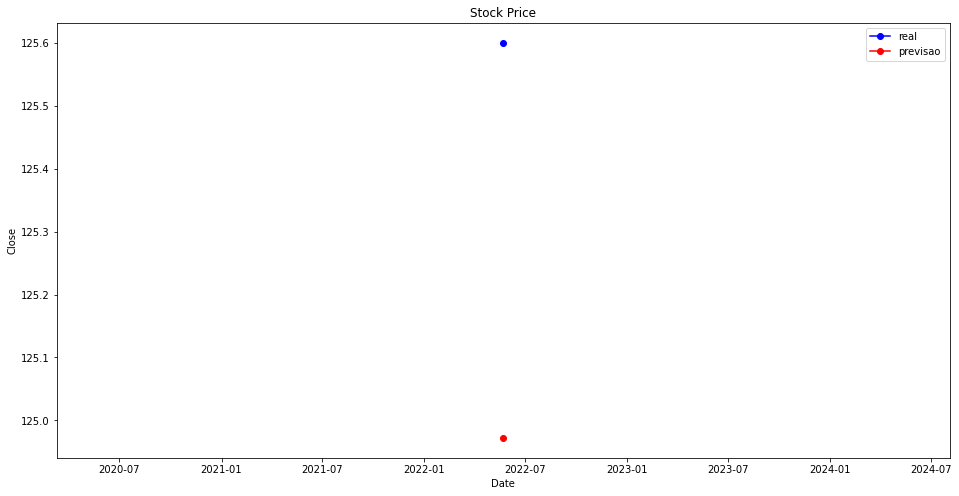

In [ ]:
#gráfico da previsão da ação

plt.figure(figsize=(16,8))
plt.title('Stock Price')
plt.plot(df['real'],label ='real',color ='blue',marker = 'o')  
plt.plot(df['previsao'],label ='previsao',color ='red',marker = 'o') 
plt.xlabel('Date')
plt.ylabel('Close')
leg = plt.legend()